# Customer Insights Project

## EDA

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

In [4]:
df = pd.read_csv("marketing_campaign.csv", delimiter = "\t")
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [6]:
df['Response'].mean()

np.float64(0.14910714285714285)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [8]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [9]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [10]:
df['Z_Revenue']

0       11
1       11
2       11
3       11
4       11
        ..
2235    11
2236    11
2237    11
2238    11
2239    11
Name: Z_Revenue, Length: 2240, dtype: int64

In [11]:
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [12]:
df.isnull().sum() # Preprocessing step

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [13]:
df['Income'] = df.groupby('Education')['Income'].transform(
    lambda x: x.fillna(x.median())
)

#filling in nas with the median based on education level

In [14]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [15]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [16]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(categories=[["Basic","2n Cycle","Graduation","Master","PhD"]])
df['Education_Encoded'] = encoder.fit_transform(df[['Education']])

In [17]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [18]:
df = pd.get_dummies(df, columns=['Marital_Status'], drop_first=True)

In [19]:
df['String Dt_Customer'] = df['Dt_Customer'].astype(str)
df['String Dt_Customer']

0       04-09-2012
1       08-03-2014
2       21-08-2013
3       10-02-2014
4       19-01-2014
           ...    
2235    13-06-2013
2236    10-06-2014
2237    25-01-2014
2238    24-01-2014
2239    15-10-2012
Name: String Dt_Customer, Length: 2240, dtype: object

In [20]:
df[['Dt_Customer', 'String Dt_Customer']].isnull().sum()

Dt_Customer           0
String Dt_Customer    0
dtype: int64

In [21]:
df['Dt_Customer']

0       04-09-2012
1       08-03-2014
2       21-08-2013
3       10-02-2014
4       19-01-2014
           ...    
2235    13-06-2013
2236    10-06-2014
2237    25-01-2014
2238    24-01-2014
2239    15-10-2012
Name: Dt_Customer, Length: 2240, dtype: object

In [24]:
# Trying to figure out tenure

# 1. Ensure it's pandas datetime (keep as datetime64[ns], not Python datetime.date)
df['Date_Customer'] = pd.to_datetime(df['String Dt_Customer'], errors='coerce', format='%d-%m-%Y')

# 2. Get reference date
reference_date = df['Date_Customer'].max()

# 3. Calculate Tenure (in days)
df['Tenure'] = (reference_date - df['Date_Customer']).dt.days
df['Tenure']

0       663
1       113
2       312
3       139
4       161
       ... 
2235    381
2236     19
2237    155
2238    156
2239    622
Name: Tenure, Length: 2240, dtype: int64

In [25]:
df['Date_Customer']

0      2012-09-04
1      2014-03-08
2      2013-08-21
3      2014-02-10
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-06-10
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Date_Customer, Length: 2240, dtype: datetime64[ns]

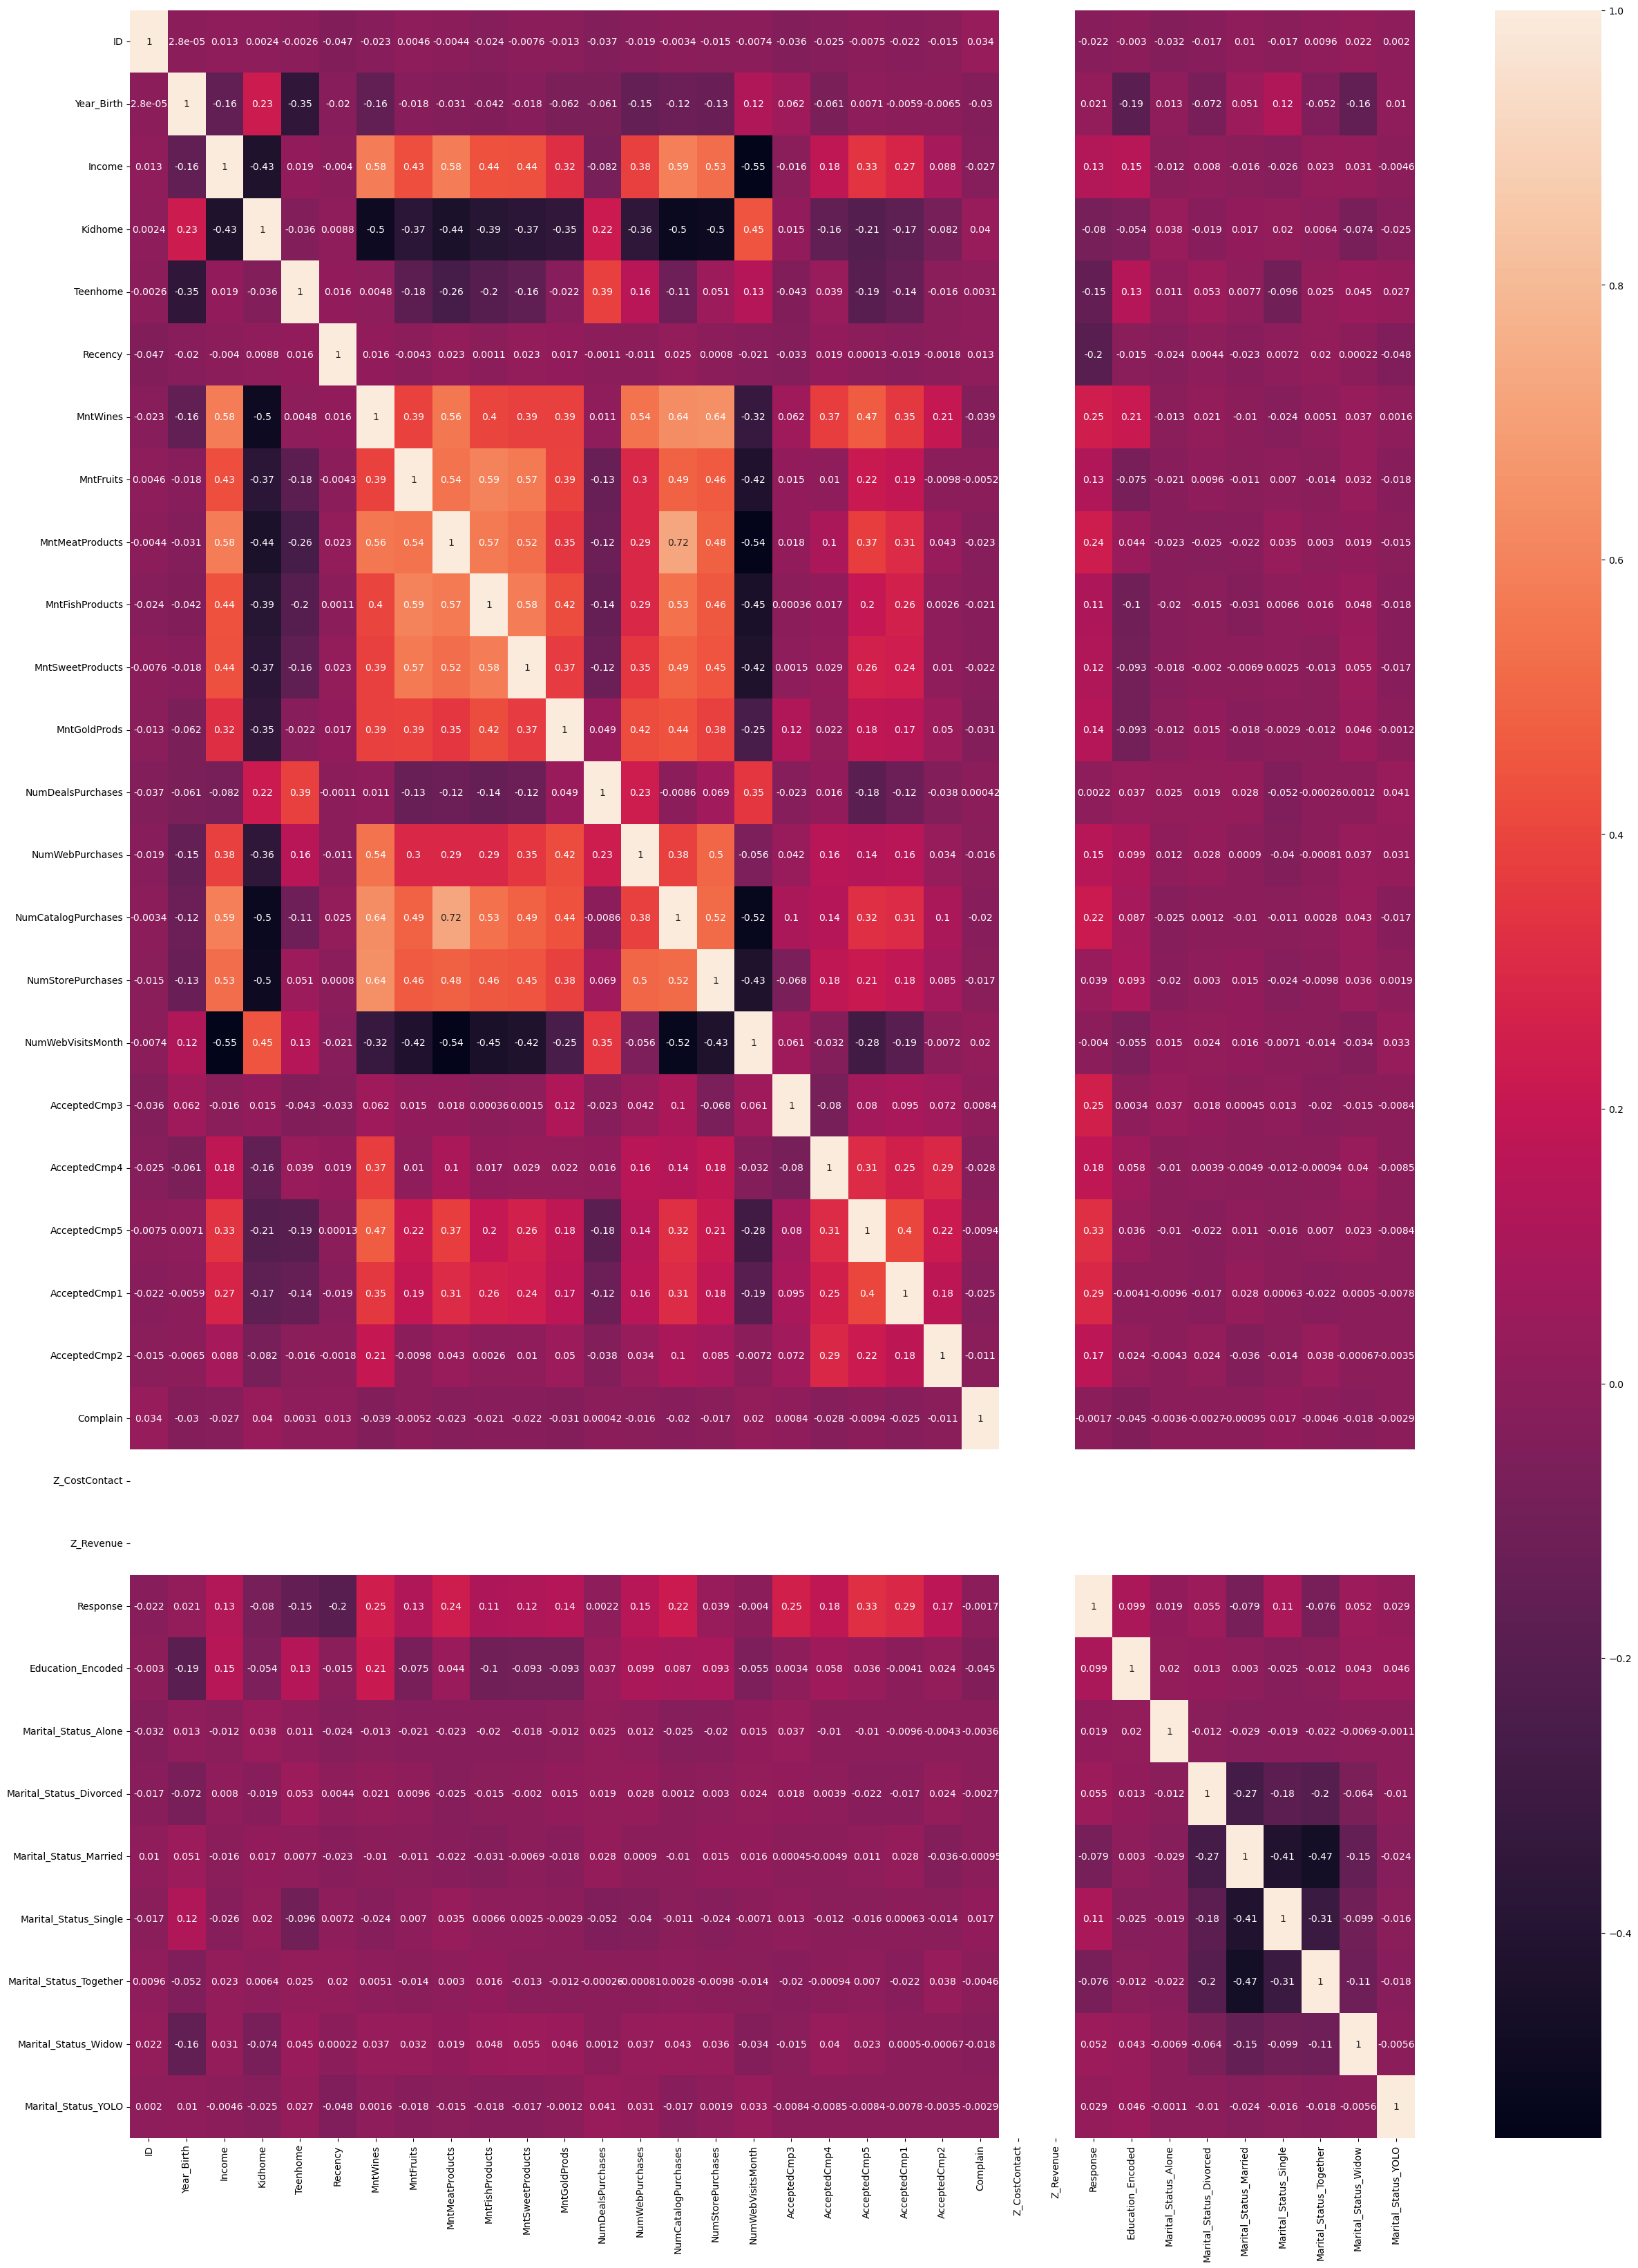

In [333]:
sns.heatmap(df.corr(numeric_only = True), annot = True)

plt.rcParams['figure.figsize'] = (30,40)

plt.show()

In [335]:
df = df.drop(columns=['Dt_Customer', 'ID'])

In [337]:
# 0) Pick the features you want in PCA (numeric only)
#    (Drop raw dates/IDs; keep engineered numeric like Recency/Tenure)
feature_cols = [c for c in df.columns if c not in ["Dt_Customer","ID","Customer_ID"]]
X = df[feature_cols].select_dtypes(include=[np.number]).copy()

# 1) Inspect where NaNs are (optional, but handy)
print(X.isna().sum().sort_values(ascending=False).head(10))

# 2) Impute numeric NaNs (median is robust for skewed vars like Income)
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

# 3) Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# 4) PCA
pca = PCA(n_components=0.85, random_state=42)  # keep ~85% variance
X_pca = pca.fit_transform(X_scaled)

print("Original shape:", X.shape, "-> PCA shape:", X_pca.shape)
print("Explained variance (cumulative):", np.cumsum(pca.explained_variance_ratio_))


Year_Birth       0
Income           0
Response         0
Z_Revenue        0
Z_CostContact    0
Complain         0
AcceptedCmp2     0
AcceptedCmp1     0
AcceptedCmp5     0
AcceptedCmp4     0
dtype: int64
Original shape: (2240, 26) -> PCA shape: (2240, 15)
Explained variance (cumulative): [0.27164212 0.35875537 0.43850426 0.49871385 0.54770345 0.59050461
 0.6319566  0.67172531 0.70634889 0.73744925 0.76631064 0.79296143
 0.81833272 0.84273369 0.86475615]


/var/folders/03/9wh4j8kj7ql2_dzhd5ljbmfc0000gn/T/ipykernel_456/3352126135.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


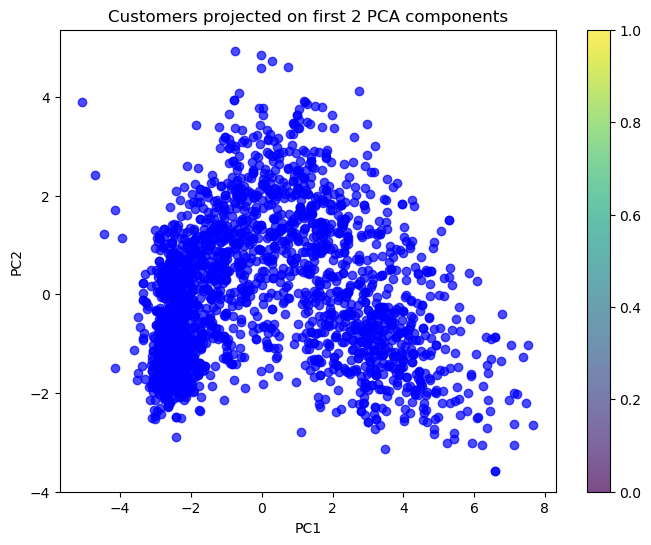

In [339]:
import matplotlib.pyplot as plt

# X_pca = pca.fit_transform(X_scaled)   # from your PCA step

plt.figure(figsize=(8,6))
plt.scatter(
    X_pca[:,0], X_pca[:,1],
    c=df['Cluster'] if 'Cluster' in df.columns else 'blue',  # color by cluster if available
    cmap='viridis', alpha=0.7
)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Customers projected on first 2 PCA components")
plt.colorbar(label="Cluster" if 'Cluster' in df.columns else "")
plt.show()


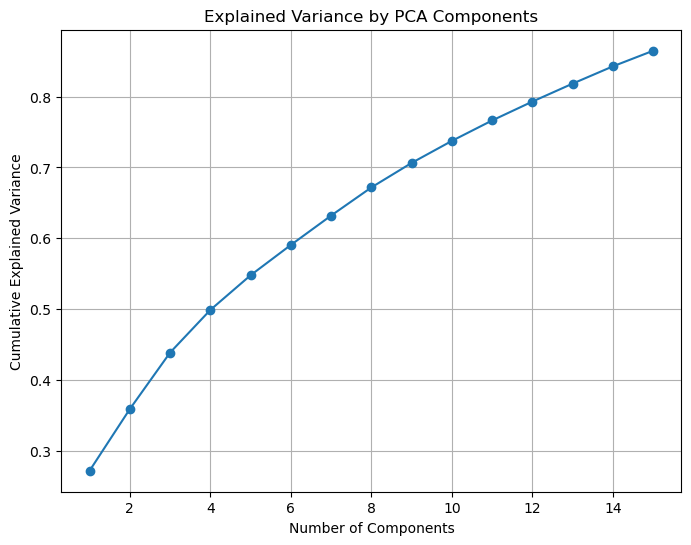

In [341]:
explained_var = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8,6))
plt.plot(range(1, len(explained_var)+1), explained_var, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components")
plt.grid(True)
plt.show()


In [431]:
# After fitting PCA
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f"PC{i+1}" for i in range(len(pca.components_))],
    index=X.columns
)

# See top features for PC1 & PC2
print("Top contributors to PC1:")
print(loadings["PC1"].sort_values(ascending=False).head(5))
print("\nTop contributors to PC2:")
print(loadings["PC2"].sort_values(ascending=False).head(5))
print("\nTop contributors to PC3:")
print(loadings["PC3"].sort_values(ascending=False).head(5))

Top contributors to PC1:
NumCatalogPurchases    0.318703
MntMeatProducts        0.312225
MntWines               0.307194
Income                 0.291321
NumStorePurchases      0.282995
Name: PC1, dtype: float64

Top contributors to PC2:
Teenhome             0.517958
NumDealsPurchases    0.424977
NumWebPurchases      0.327889
Education_Encoded    0.260335
MntWines             0.202990
Name: PC2, dtype: float64

Top contributors to PC3:
Response        0.425718
AcceptedCmp4    0.381432
AcceptedCmp2    0.379139
AcceptedCmp5    0.375247
AcceptedCmp1    0.330004
Name: PC3, dtype: float64


In [357]:
def top_features_for_pc(loadings, pc, top_n=5):
    sorted_feats = loadings[pc].abs().sort_values(ascending=False)
    return ", ".join(sorted_feats.head(top_n).index)

pc1_label = top_features_for_pc(loadings, "PC1")
pc2_label = top_features_for_pc(loadings, "PC2")

print("PC1 axis ~", pc1_label)
print("PC2 axis ~", pc2_label)

PC1 axis ~ NumCatalogPurchases, MntMeatProducts, MntWines, Income, NumStorePurchases
PC2 axis ~ Teenhome, NumDealsPurchases, Year_Birth, NumWebPurchases, Education_Encoded


In [435]:
# === 2) Fit final KMeans model
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init="auto")
df["Cluster"] = kmeans.fit_predict(X_pca)   # assign labels back to df

print(df["Cluster"].value_counts())


Cluster
0    1359
1     881
Name: count, dtype: int64


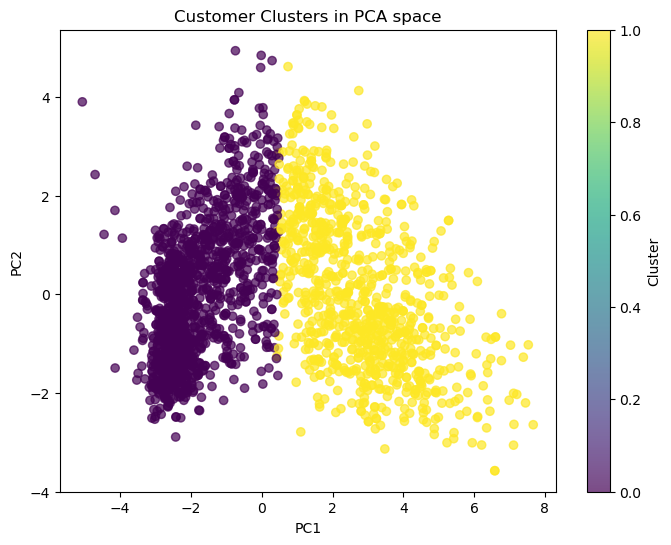

In [363]:
# === 3) Visualize in PCA space (only works if you kept at least 2 PCs)
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=df["Cluster"], cmap="viridis", alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Customer Clusters in PCA space")
plt.colorbar(label="Cluster")
plt.show()


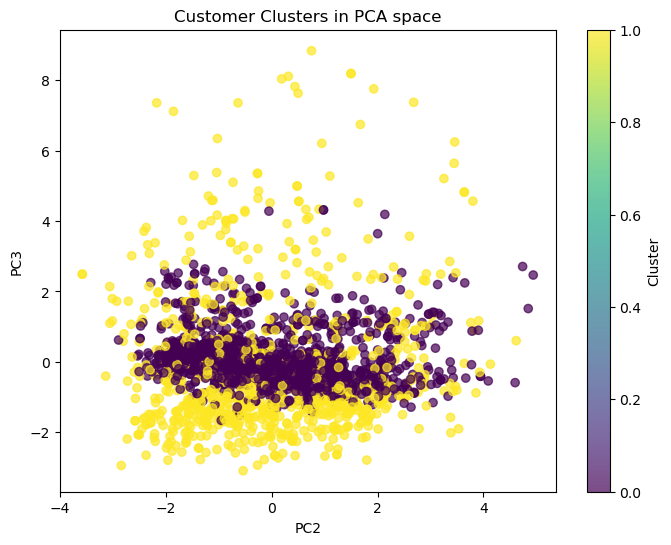

In [437]:
# === 3) Visualize in PCA space (only works if you kept at least 2 PCs)
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,1], X_pca[:,2], c=df["Cluster"], cmap="viridis", alpha=0.7)
plt.xlabel("PC2")
plt.ylabel("PC3")
plt.title("Customer Clusters in PCA space")
plt.colorbar(label="Cluster")
plt.show()

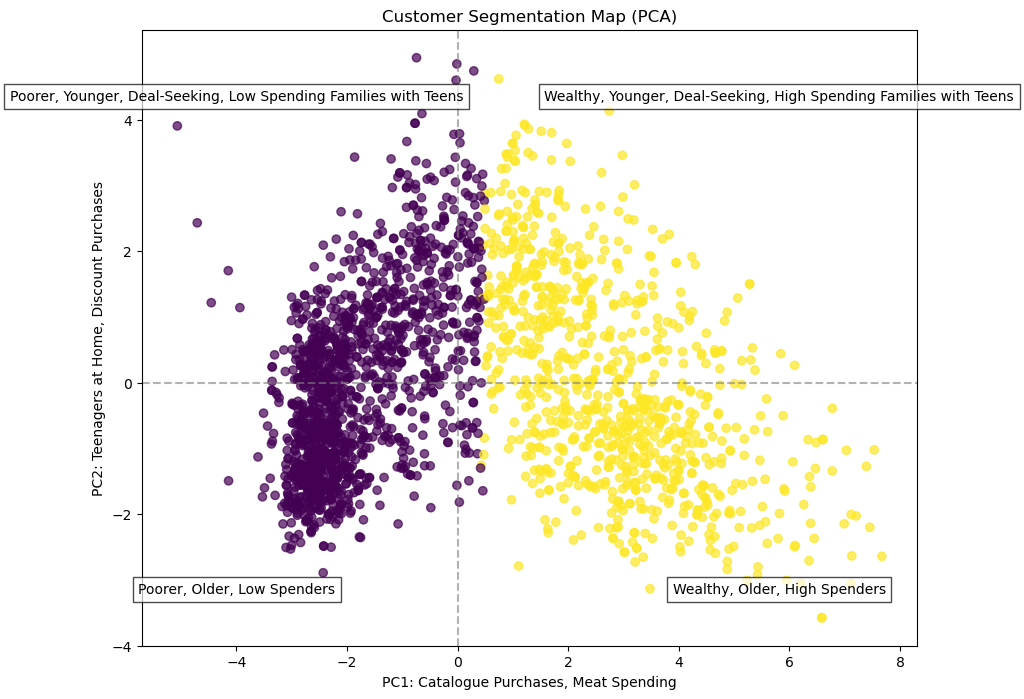

In [379]:
plt.figure(figsize=(10,8))

# Scatter plot (color by cluster if available)
plt.scatter(
    X_pca[:,0], X_pca[:,1],
    c=df["Cluster"] if "Cluster" in df.columns else "blue",
    cmap="viridis", alpha=0.7
)

# Axis labels (use your top contributors)
plt.xlabel("PC1: Catalogue Purchases, Meat Spending")
plt.ylabel("PC2: Teenagers at Home, Discount Purchases")
plt.title("Customer Segmentation Map (PCA)")

# Add quadrant annotations
xlim = plt.xlim()
ylim = plt.ylim()
x_mid = (xlim[0] + xlim[1]) / 2
y_mid = (ylim[0] + ylim[1]) / 2

plt.axhline(0, color="gray", linestyle="--", alpha=0.6)
plt.axvline(0, color="gray", linestyle="--", alpha=0.6)

plt.text(xlim[1]*0.7, ylim[1]*0.8,
         "Wealthy, Younger, Deal-Seeking, High Spending Families with Teens",
         fontsize=10, ha="center", color="black", bbox=dict(facecolor="white", alpha=0.7))

plt.text(xlim[0]*0.7, ylim[1]*0.8,
         "Poorer, Younger, Deal-Seeking, Low Spending Families with Teens",
         fontsize=10, ha="center", color="black", bbox=dict(facecolor="white", alpha=0.7))

plt.text(xlim[1]*0.7, ylim[0]*0.8,
         "Wealthy, Older, High Spenders",
         fontsize=10, ha="center", color="black", bbox=dict(facecolor="white", alpha=0.7))

plt.text(xlim[0]*0.7, ylim[0]*0.8,
         "Poorer, Older, Low Spenders",
         fontsize=10, ha="center", color="black", bbox=dict(facecolor="white", alpha=0.7))

plt.show()


In [367]:
# X_pca has shape (n_samples, n_components_kept)
# Use first 5 PCs for clustering:
X_for_clustering = X_pca[:, :5]

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sil = {}
for k in range(2, 11):
    labels = KMeans(n_clusters=k, random_state=42, n_init="auto").fit_predict(X_for_clustering)
    sil[k] = silhouette_score(X_for_clustering, labels)

best_k = max(sil, key=sil.get)
print("Best k on first 5 PCs:", best_k)
df["Cluster"] = KMeans(n_clusters=best_k, random_state=42, n_init="auto").fit_predict(X_for_clustering)


Best k on first 5 PCs: 2


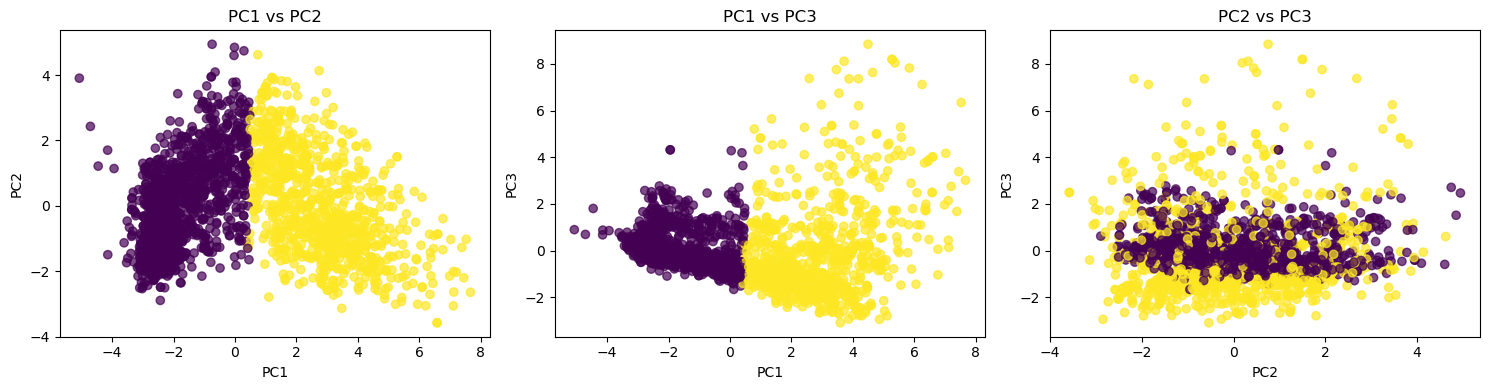

In [369]:
import matplotlib.pyplot as plt

pairs = [(0,1), (0,2), (1,2)]  # PC1-2, PC1-3, PC2-3
plt.figure(figsize=(15,4))
for i,(a,b) in enumerate(pairs, 1):
    plt.subplot(1,3,i)
    plt.scatter(X_pca[:,a], X_pca[:,b], c=df["Cluster"], cmap="viridis", alpha=0.7)
    plt.xlabel(f"PC{a+1}"); plt.ylabel(f"PC{b+1}")
    plt.title(f"PC{a+1} vs PC{b+1}")
plt.tight_layout(); plt.show()


In [371]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# How many PCs were kept? (e.g., PCA(n_components=0.85))
n_total = X_pca.shape[1]

results = {}

for n_pcs in [2, 3, 5, n_total]:
    Xn = X_pca[:, :n_pcs]   # take first n PCs
    sil_scores = {}
    for k in range(2, 11):  # try 2–10 clusters
        labels = KMeans(n_clusters=k, random_state=42, n_init="auto").fit_predict(Xn)
        sil_scores[k] = silhouette_score(Xn, labels)
    best_k = max(sil_scores, key=sil_scores.get)
    results[n_pcs] = (best_k, sil_scores[best_k])

# Print results
for n_pcs, (k, score) in results.items():
    print(f"Using first {n_pcs} PCs → best k={k}, silhouette={score:.3f}")


Using first 2 PCs → best k=2, silhouette=0.524
Using first 3 PCs → best k=2, silhouette=0.464
Using first 5 PCs → best k=2, silhouette=0.380
Using first 15 PCs → best k=2, silhouette=0.277


In [373]:
import pandas as pd
import numpy as np

def cluster_profile(df, cluster_col="Cluster", max_categories=3):
    """
    Summarize each cluster:
    - Numeric columns: mean and std
    - Categorical columns: most frequent (mode)
    """
    profiles = {}
    num_cols = df.select_dtypes(include=[np.number]).columns.drop(cluster_col, errors="ignore")
    cat_cols = df.select_dtypes(exclude=[np.number]).columns

    for cluster in sorted(df[cluster_col].unique()):
        cluster_df = df[df[cluster_col] == cluster]
        profile = {}

        # Numeric summaries
        for col in num_cols:
            profile[f"{col}_mean"] = cluster_df[col].mean()
            profile[f"{col}_std"] = cluster_df[col].std()

        # Categorical summaries (top modes)
        for col in cat_cols:
            top_values = cluster_df[col].value_counts().head(max_categories).to_dict()
            profile[f"{col}_top"] = top_values

        profiles[cluster] = profile

    return pd.DataFrame(profiles).T


In [375]:
# After clustering (df["Cluster"] assigned)
profile_table = cluster_profile(df, cluster_col="Cluster")
profile_table

,Year_Birth_mean,Year_Birth_std,Income_mean,Income_std,Kidhome_mean,Kidhome_std,Teenhome_mean,Teenhome_std,Recency_mean,Recency_std,...,Education_Encoded_mean,Education_Encoded_std,Education_top,Marital_Status_Alone_top,Marital_Status_Divorced_top,Marital_Status_Married_top,Marital_Status_Single_top,Marital_Status_Together_top,Marital_Status_Widow_top,Marital_Status_YOLO_top
0,1969.927152,11.536003,39308.25791,15395.330133,0.689478,0.532424,0.560706,0.544582,48.84621,29.061573,...,2.414275,1.039628,"{'Graduation': 657, 'PhD': 280, 'Master': 239}","{False: 1356, True: 3}","{False: 1227, True: 132}","{False: 819, True: 540}","{False: 1068, True: 291}","{False: 1006, True: 353}","{False: 1321, True: 38}","{False: 1357, True: 2}"
1,1967.07605,12.454184,72194.653802,23927.306782,0.065834,0.252671,0.422247,0.533986,49.515323,28.820645,...,2.531215,0.943514,"{'Graduation': 470, 'PhD': 206, 'Master': 131}",{False: 881},"{False: 781, True: 100}","{False: 557, True: 324}","{False: 692, True: 189}","{False: 654, True: 227}","{False: 842, True: 39}",{False: 881}
